First, we will import the required libraries, do some dataset cleaning, and get some statistics on the dataset. 

/var/folders/qs/y_42y3h93jv23qnfh44b69bw0000gn/T/ipykernel_93655/342124042.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/qs/y_42y3h93jv23qnfh44b69bw0000gn/T/ipykernel_93655/342124042.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StateHoliday'] = df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}).astype(int)


         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  
0                   0              1  
1                   0              1  
2                 

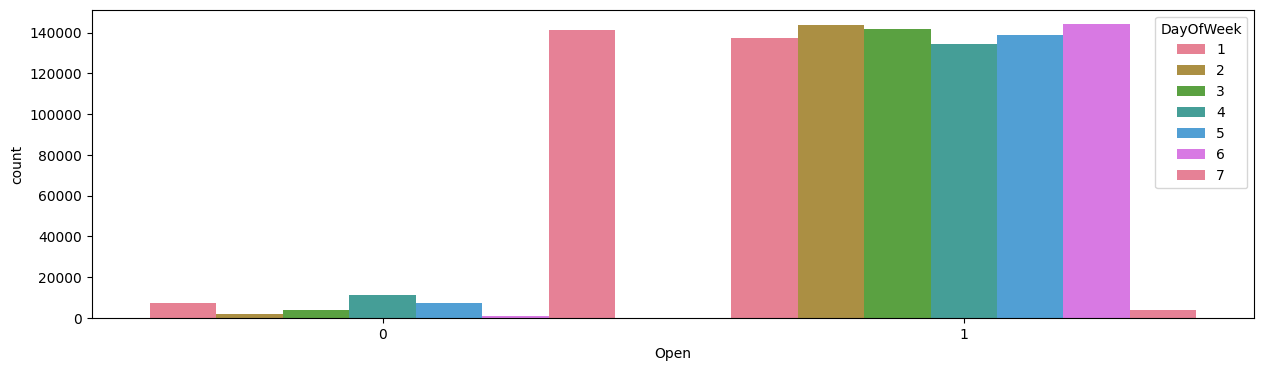

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create a file path because the csv is in a different file
file_path = "DATASETS/train.csv"

# read the csv
df = pd.read_csv(file_path)

# clean the dataset. In StateHoliday, replace as necessary
df['StateHoliday'] = df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}).astype(int)

print(df)

# Check to see how many missing values there are
print("There are", df.isnull().sum()), "missing values. "

# fill in missing values for numerical columns with the mean or median
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Customers'] = df['Customers'].fillna(df['Customers'].mean())

# if 'StateHoliday' or 'SchoolHoliday' is missing, you can fill them with a default value -> in our case, it is 0
df['StateHoliday'] = df['StateHoliday'].fillna(0).astype(int)
df['SchoolHoliday'] = df['SchoolHoliday'].fillna(0).astype(int)


# Plot the hashmap (you can lowk remove this because it is useless)
plt.figure(figsize=(150, 90))
plt.title("Visualizing Missing Values (df_train)")
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette('magma'), yticklabels=False)
plt.show()

# plot to show many days it is opev vs closed (0 vs 1)
fig, ax1=plt.subplots(figsize=(15, 4))
sns.countplot(x='Open', hue='DayOfWeek', data=df, palette="husl", ax=ax1)
plt.show()

In [11]:
print(f"Number of entries: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nDataset columns:\n", df.columns)
print("\nBasic Statistics:\n", df.describe().round(2))

Number of entries: 1017209
Number of features: 9

Dataset columns:
 Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

Basic Statistics:
             Store  DayOfWeek       Sales   Customers        Open       Promo  \
count  1017209.00  1017209.0  1017209.00  1017209.00  1017209.00  1017209.00   
mean       558.43        4.0     5773.82      633.15        0.83        0.38   
std        321.91        2.0     3849.93      464.41        0.38        0.49   
min          1.00        1.0        0.00        0.00        0.00        0.00   
25%        280.00        2.0     3727.00      405.00        1.00        0.00   
50%        558.00        4.0     5744.00      609.00        1.00        0.00   
75%        838.00        6.0     7856.00      837.00        1.00        1.00   
max       1115.00        7.0    41551.00     7388.00        1.00        1.00   

       StateHoliday  SchoolHoliday  
count    101720

From the above, we can see that there are 1017209 entries in the data set. We are also working with 9 columns: 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'. 

Now, we will perform statistical analysis on the dataset. 

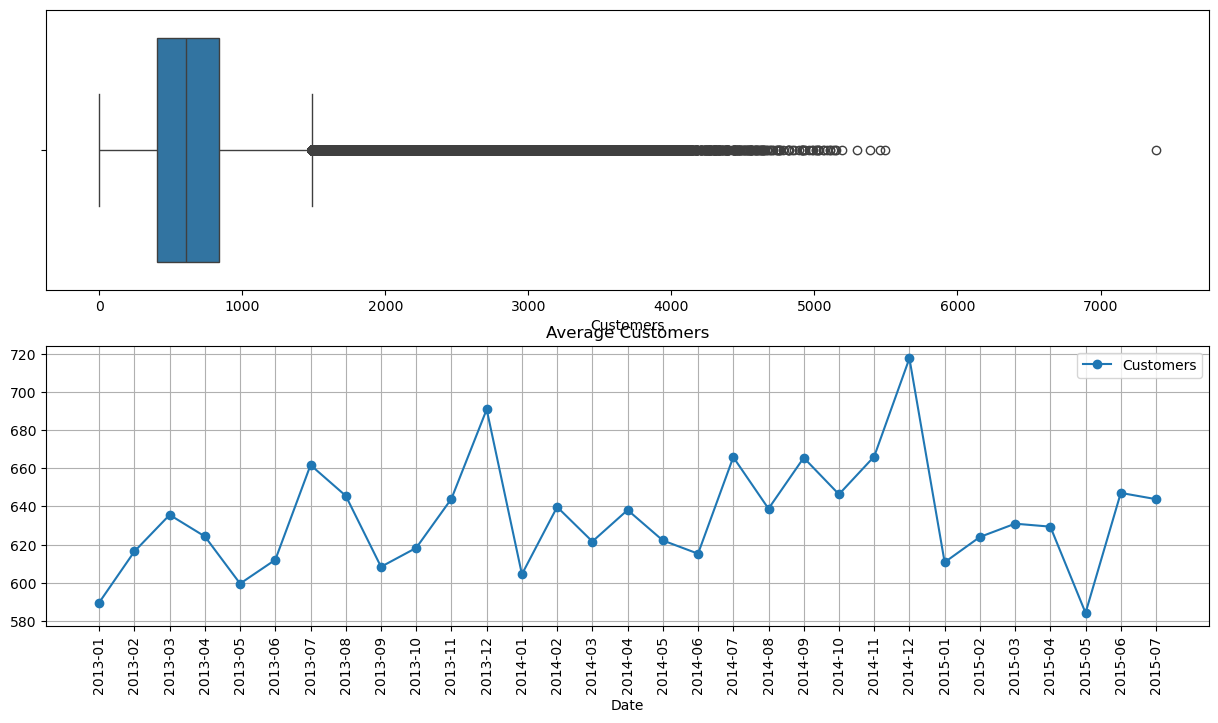

In [33]:
# From the above, we can see that there are 1017209 entries in the data set. We are also working with 9 columns: 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'. 
# Now, we will perform statistical analysis on the dataset. 

# convert the values to string
df['Date']=df['Date'].apply(lambda x: (str(x)[:7]))
df['Date']=df['Date'].apply(lambda x: (str(x)[:7]))

# box plot measurements
fig, (axis1, axis2)=plt.subplots(2, 1, figsize=(15, 8))

# plot the box plot
sns.boxplot(df['Customers'], whis=1.5, ax=axis1, orient='h')

# calculate the mean between the date and number of customers
avr_customers=df.groupby('Date')['Customers'].mean()

# everything below is just to plot the graph to show the average customers
ax=avr_customers.plot(legend=True, ax=axis2, marker='o', title="Average Customers")
ax.set_xticks(range(len(avr_customers)))
xlabels = ax.set_xticklabels(avr_customers.index.tolist(), rotation=90)
ax.grid()